In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from nltk.tokenize import sent_tokenize, word_tokenize, regexp_tokenize
import nltk
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter
from spacy.lang.en import English

In [2]:
Titles = pd.read_csv('Titles_English.csv')

In [3]:
Titles = Titles.drop('Unnamed: 0', axis=1)
Titles['EAN'] = Titles['EAN'].astype(str)

In [4]:
Titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300359 entries, 0 to 300358
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   EAN                   300359 non-null  object
 1   Title                 300359 non-null  object
 2   Ingram Category Code  298878 non-null  object
 3   MJR BISAC             300359 non-null  object
 4   BISAC                 300359 non-null  object
 5   Annotation Text       300359 non-null  object
 6   Category              300359 non-null  int64 
 7   language_detected     300359 non-null  object
dtypes: int64(1), object(7)
memory usage: 18.3+ MB


In [5]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=650, ngram_range=(1,1), stop_words='english')
features = tfidf.fit_transform(Titles['Annotation Text']).toarray()
labels = Titles.Category
features.shape

(300359, 4661)

In [6]:
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(Titles['Annotation Text'], Titles['Category'], random_state = 42)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

C:\Users\Pupnsuds90\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Pupnsuds90\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

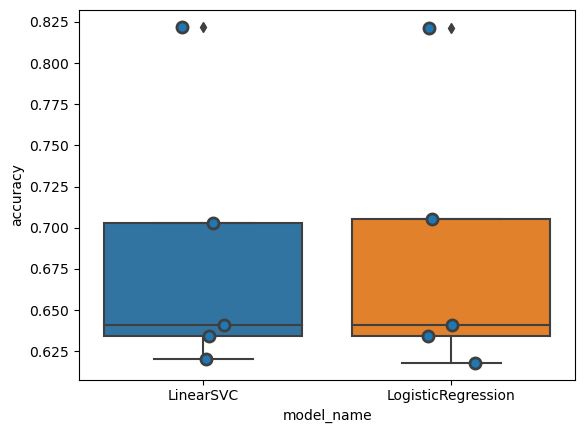

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    LinearSVC(),
    LogisticRegression(random_state=42),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [8]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC             0.684048
LogisticRegression    0.683981
Name: accuracy, dtype: float64